In [8]:
!pip install -Uqq fastbook duckduckgo_search
import fastbook
fastbook.setup_book()

In [10]:
from fastbook import *

## Deep Learning

- Deep learning is a computer technique to extract and transform data by using multiple layers of a neural network
- Each layer takes inputs from previous layers and progressively refines them
- Layers are trained by algorithms that minimize their errors and imporve accuracy
- In this way the network eventually **learns** the specific task
- deep learning has such varied applications yet nearly all of deep learning is based on a single type of model, the neural network

### Parallel distributed processing requires
- A set of processing units
- A state of activation
- An output function for each unit
- A pattern of connectiviy among units
- A propagation rule for propagating patterns of activities through the network of connectivity
- An activation rule for combining inputs impinging on a unit with the current state of that unit to produce an output for the unit
- A learning rule whereby patters of connectivity are modified by experience
- An environment within the system must operate

In [5]:
# Your first model
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): 
    return x[0].isupper()

data_loaders = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224)
)

learn = vision_learner(data_loaders, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.165479,0.035148,0.010149,24:53


epoch,train_loss,valid_loss,error_rate,time
0,0.059959,0.019948,0.006766,33:22


In [30]:
from duckduckgo_search import ddg_images
from fastcore.all import *
urls = L(ddg_images("Cat", max_results=1)).itemgot("image")
urls[0]
download_url(urls[0], "cat.jpg", show_progress=True)

Path('cat.jpg')

In [32]:
is_cat, _, probability = learn.predict("cat.jpg")
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probability[1].item():.6f}")


Is this a cat?: True.
Probability it's a cat: 1.000000


## What is Machine Learning? 
- Deep learning is a modern area in a more general discipline of machine learning
- Machine learning is a way to get computers to complete a specific task.
- Traditional programming consists if inputs, the program and a result and the need to specify every instruction and direction

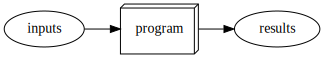

In [11]:
# Traditional programming
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

- instead of telling the computer exactly what is required, show it examples of a problem and the answers and let it figure out how to solve it itself. 

Arthur Samuel 
- **Suppose we arrange for some automatic means of testing the effectiveness of any current weight assignment in terms of actual performance and provide a mechanism for altering the weight assignment so as to maximize the performance. We need not go into the details of such a procedure to see that it could be made entirely automatic and to see that a machine so programmed would "learn" from its experience.**

- This statement introduces concepts including
    - the idea of weight assignments
    - every weight assignment has a performance metric
    - requirement that there be an automatic means of testing that performance
    - need for a mechanism which improves the performance by changing the weight assignments

### Weight Assignment
- weights are just variables, and a weight assignment is a particular choice of values for those variables.
- inputs are values that it processes to produces results (ie. image pixels as inputs). Weight assignments are other values that define how the program will operate

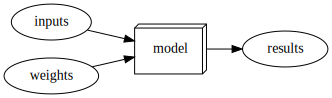

In [12]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

- weights are also called model parameters
- Next we need an automatic means of testing the effectivness of the weight assignments in terms of actual performance. 
- Finally a mechanism for altering these weights to maximize performance. 
- These weights would be adjusted using some automated mechanism based on the produced performance

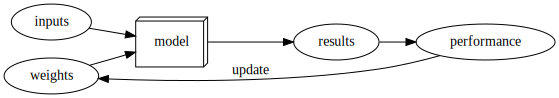

In [13]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

- when the model is considered trained, the weights become a part of the model and are no longer varied. 
- using a model after it is trained looks like the below figure

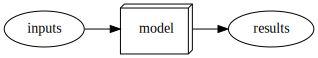

In [14]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

- finding a new mechanism for automatically updating weights for every problem would be laborious. A general way to do this to improve any given task exists. 
- stochastic gradient descent (SGD)
    - will be covered in more detail later
- We do not need to go into details of such a procedure to see that it could be made entirely automatic and to see that a machine so programmed would learn from its experience
### Deep Learning Terms
- functional form of the model can be called architecture
- weights can be called parameters
- predictions are calculated from the independent variable, which is the data not included in the labels
- results of the model are called predictions
- measure of performance is called loss
- loss depends not only on predictions but also correct labels or targets

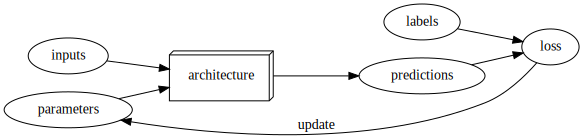

In [15]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

### Limitations Inherent to Machine Learning
- a model cannot be created without data
- a model can only learn to operate on the patterns seen in the input data used to train it
- learning approach only creates predictions not recommended actions
- we need labels for data to train the model not just the input data

## How our image recognizer works
- download the fast.ai dataset
```
path = untar_data(URLs.PETS)/'images'
```

- define a function is_cat which labels cats based on a filename rule provided by the dataset creators
```
def is_cat(x): return x[0].isupper()
```
- Tell fastai what kind of dataset we have and how it is structred
```
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid+pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))
```
- Define the transforms needed. A Transform contains code that is applied during training
    - item_tfms applied to each item (ex. resize)
    - batch_tfms applied to a batch of items at a time using the GPU
- 224 pixels is standard size for historical reasons (old pretrained models required this size exactly). Larger size may result in better results but at the cost of speed and memory consumption

- Classification vs Regression
    - two main types of models
    - classification attempts to predict a class or category (ex. "dog" or "cat")
    - regression attempts to predict a number of discrete possibilities (ex. temperature) 
    
 - valid_pct=0.2 tells fastai to hold out 20% of the data and not use it for training but for testing
 - seed=42 sets a random seed to the same value every time we run this code. This way if we keep the seed the same we will have the same validation set. 
 - we always check accuracy on the validation set never the training set
     - training a large enough model for a long enough time will memorize every label in your dataset (overfitting)

- overfitting is the single most important and challenging issue when training for all machine learning

- Tells fastai to create a convolutional neural network (CNN) and specifies what architecture to use, what data we want to train it on, and what metric to use
```
learn = vision_learner(dls, resnet34, metrics=error_rate)
```
- metric is a function that measures the quality of the model's predictions using the validation set. In this case we use error_rate
    - metric may remind you of loss but there is a distinction. Loss defines measure of performance that the training system can use to update weights automatically. Loss is defined for SGD use, but a good metric is used for humans to understand
    - loss function might be a suitable metric, but this is not always the case

- vision_learner has a parameter pretrained which defaults to True. This sets the weights in your model to values that have already been trained by experts to recognize thousands of different categories
- You should always use a pretrained model which already has weights. This is due to it already being proven to be capable. 
    - for example they can handle edge, gradient, and color detection needed for tasks
- using a pretrained model will remove the last layer since that is always specifically customized to the original training task and replace it with one or more new layers with randomized weights of an appropriate size for the dataset yoy are working with. This is called the head

- pretrained models allow us to train more accurate models, more quickly with less data

- tells fastai how to fit the model
```
learn.fine_tune(1)
```
- a transfer learning technique where the parameters of the pretrained model are updated by training for additional epochs using a different task to that used for pretraining
- fastai will do two things
    - use one epoch to fit just those parts of the model necessary to get the new random head to work correctly with your datset
    - use the number of epochs requested when calling the method to fit the entire model, updating the weights of the later layers faster than the earlier layers. 

### Deep Learning is Not Just for Image Classification
- ie. localizing objects in a picture
- self-driving cars do not know where a pedestrian is, then it doesn't know how to avoid one
- creating a model that can recognize the content of every individual pixel in an image is called segementation. 
- How can we train a segmentation model with fastai using a subset of teh camvid dataset.

In [16]:
path = untar_data(URLs.CAMVID_TINY)
data_loaders = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=get_image_files(path/"images"), 
    label_func= lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes=np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(data_loaders, resnet34)
learn.fine_tune(8)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,3.355215,2.635721,01:06


epoch,train_loss,valid_loss,time
0,2.111054,1.793930,01:11
1,1.765928,1.347723,01:12
2,1.549101,1.177075,01:12
3,1.389102,0.986366,01:12
4,1.236802,0.897387,01:12
5,1.111907,0.801640,01:12
6,1.007156,0.766733,01:12
7,0.927012,0.767458,01:11


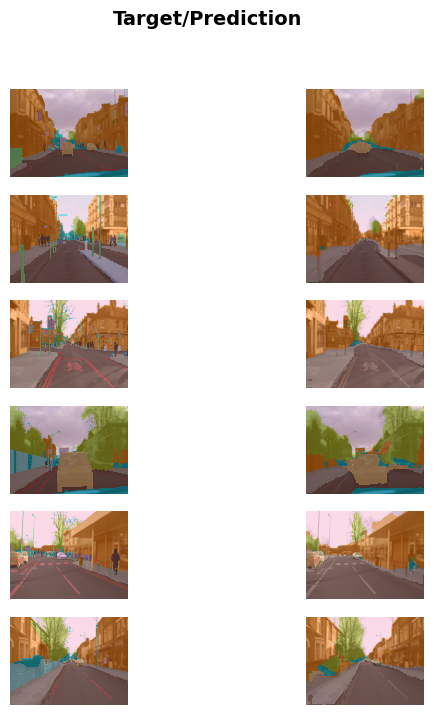

In [17]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
## NLP Example

from fastai.text.all import *
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=16)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

### Clean
- if you hit a "CUDA out of memory error" after running the above cell instead of executing it, execute this instead

```
from fastai.text.all import *
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)
```

- this reduces batch size to 32. If the error is hit again, change to 16


In [ ]:
# sentiment analysis on movie reviews
learn.predict("I really like that movie!")